Clustering and K-means

1. Clustering assignment - each data point is assigned a cluster

2. Group representatives - Each group's centroid

3. Clustering objective - J-Clust is the clustering objective function.

J-clust - the objective function for clustering. It measures the average Euclindean distance squared to each centroid. Any solution that mimizes J-clust is an optimal solution.

In [48]:
using VMLS, SparseArrays, LinearAlgebra, Plots
#also called global dissimilarity
#assignment = c
#reps = z
#x = entries of data

Jclust(x, reps, assignment) = avg([norm(x[i]-reps[assignment[i]])^2 for i=1:length(x)])

Jclust (generic function with 1 method)

In [14]:
x = [[0,1], [1,0], [-1,1]]; reps = [[1,1],[0,0]]; assignment = [1,2,1]

3-element Array{Int64,1}:
 1
 2
 1

In [15]:
Jclust(x, reps, assignment)

2.0

In [33]:
#change assignment
assignment = [1,1,2]

Jclust(x, reps, assignment)

1.3333333333333333

In [23]:
#kmeans algorithm

function kmeans(x, k; maxiters = 100, tol = 0.000001) #semicolon optional parameters / default's
    N = length(x) #number of entries
    n = length(x[1]) #number of dimensions
    distances = zeros(N) #length of x
    reps = [zeros(n) for j=1:k] #k centers with width of n dimensions
    
    #initialization of the algorithm
    assignment = [rand(1:k) for i in 1:N]
    
    Jprevious = Inf #infinity stopping condition
    
    #main
    for iter = 1:maxiters
        
        #Finding the centroid or representative of cluster j
        for j = 1:k
            group = [i for i=1:N if assignment[i]==j]
            reps[j] = sum(x[group])/length(group);
        end;
    
    #distance for each entry to centroid
    
        for i = 1:N
            (distances[i], assignment[i]) = findmin([norm(x[i]-reps[j]) for j = 1:k])
        end;
                    
    J = norm(distances)^2 / N
                    
    println("Iteration ", iter, ": Jclust = ", J)
                    
    if iter > 1 && abs(J - Jprevious) < tol*J
        return assignment, reps
    end
    
    Jprevious = J

end
                    
end

kmeans (generic function with 1 method)

In [31]:
assignment, representatives = kmeans(x, 2)
println("assignemnts:", assignment, " reps= ", reps)

Iteration 1: Jclust = 0.1666666666666667
Iteration 2: Jclust = 0.1666666666666667
assignemnts:[2, 1, 2] reps= [[1, 1], [0, 0]]


In [59]:
x = [rand(2) for i in 1:100]

100-element Array{Array{Float64,1},1}:
 [0.06762626804786454, 0.3414995713006568]
 [0.15982384024441454, 0.3956561681342312]
 [0.04746621601882017, 0.085184541095354]
 [0.9163174103010923, 0.8237113036363475]
 [0.21269409208429102, 0.45079066089390296]
 [0.24351683692878323, 0.5081701666366942]
 [0.3813048926242477, 0.9036606167888117]
 [0.5182351205521187, 0.573929755476567]
 [0.31098741059348156, 0.6440974337583794]
 [0.7194099937373706, 0.08431281645123478]
 [0.40059767013344905, 0.7657332413323208]
 [0.5273692424141463, 0.059029112309512355]
 [0.2536455274155587, 0.41227871046478737]
 ⋮
 [0.7128516300805725, 0.4507387002813603]
 [0.01507191242175776, 0.3448124324613506]
 [0.30192584263084443, 0.17607008156411008]
 [0.8772186730321105, 0.8236335945992701]
 [0.529568421387806, 0.7582111255012056]
 [0.7846322942704071, 0.3479910645661688]
 [0.09194138158541021, 0.507461110679281]
 [0.7351503625533486, 0.9575835851724759]
 [0.5348076369015564, 0.007356776607613913]
 [0.3855372495173197

In [36]:
assignment, representatives = kmeans(x, 5)

Iteration 1: Jclust = 0.10489906900274158
Iteration 2: Jclust = 0.045490978780849865
Iteration 3: Jclust = 0.03821488867674222
Iteration 4: Jclust = 0.034970852534297575
Iteration 5: Jclust = 0.03414972043468316
Iteration 6: Jclust = 0.03396979772797092
Iteration 7: Jclust = 0.03378568410300225
Iteration 8: Jclust = 0.03378568410300225


([2, 3, 4, 4, 1, 2, 5, 4, 5, 2  …  4, 2, 2, 1, 2, 3, 2, 5, 3, 3], [[0.4401272257331616, 0.7827147867495657], [0.7158901225099439, 0.2893867590208161], [0.21659690115991462, 0.2672676844543313], [0.8413327124939428, 0.7716316459784496], [0.12844680410699438, 0.7012068403870503]])

In [50]:
#make

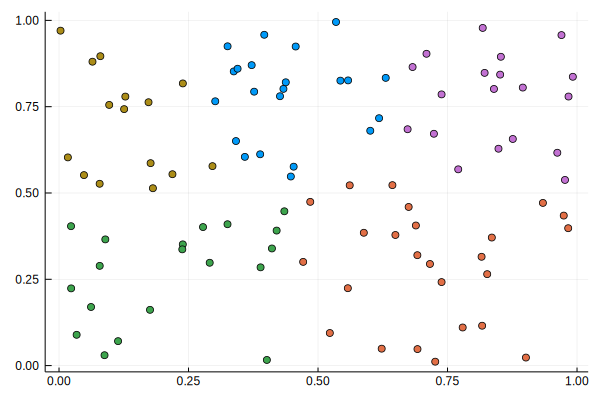

In [58]:
a = [i[1] for i in x]
b = [i[2] for i in x]

scatter(a,b, markercolor=assignment, legend=false)